# **uv-theory for LJ Chains**

In [1]:
from feos.si import *
from feos.eos import *
from feos.uvtheory import *
#from feos.eos.estimator import *

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import seaborn as sns
import numpy as np

colors = sns.color_palette("winter", 10)
sns.set_context("talk")
sns.set_style("ticks")

In [2]:
m=5.0
rep = 24.0
att = 6.0
sigma = 1.0
epsilon_k = 1.0

parameters = UVParameters.new_simple(m,rep,att,sigma,epsilon_k)

eos = EquationOfState.uvtheory(parameters,  max_eta=0.5, 
                               perturbation=Perturbation.WeeksChandlerAndersenTPT,
                               virial_order=VirialOrder.Second,
                               # combination_rule=CombinationRule.OneFluidPsi
                              )


s = State(eos,temperature=2.0*KELVIN,density=0.15/(NAV*(sigma*ANGSTROM)**3))

In [3]:
s.density

249.08086007607696 kmol/m³

In [4]:
s.entropy(Contributions.Residual)/KB#/(NAV*KB*s.temperature)

-8.08210970390376

In [5]:
s.helmholtz_energy(Contributions.Residual)/(KB*s.temperature)

0.9341093767307782

In [6]:
rep = 12.0
att = 6.0
sigma = 1.0
epsilon_k = 1.0

In [7]:
# Read Simulation Data from Deiters
deiters_data = pd.read_csv("reference_data/deiters_pure_chains.txt")
#deiters_data.head()

data = {
    'm': [1, 4, 6, 12, 3, 5, 8, 16],
    'Tc': [1.290, 2.260, 2.500, 2.920, 2.041, 2.380, 2.680, 3.080],
    'rho_c': [0.308, 0.264, 0.245, 0.210, 0.274, 0.253, 0.230, 0.200]
}

deiters_cp = pd.DataFrame(data)

# Schultz-Flory analysis of critical point LJ chains

In [8]:
# for mi in np.linspace(1,150):

results = [];
# for mi in [2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,120,240,480,920,1640,3280,
for mi in [1000,2000,3000,4000,5000,10000,15000,20000,30000,50000,100000,200000,500000,
           1000000,10000000]:
    

    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters,  max_eta=0.5, 
                                   perturbation=Perturbation.WeeksChandlerAndersenTPT,
                                   virial_order=VirialOrder.Second,
                                   # combination_rule=CombinationRule.OneFluidPsi
                                  )
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 50 * KELVIN)
    
    print(mi,mi*state_cp.density/(1/(NAV*(sigma*ANGSTROM)**3)))
    
    results.append((mi,
                    state_cp.temperature/KELVIN, 
                    mi*state_cp.density/(1/(NAV*(sigma*ANGSTROM)**3)),
                    state_cp.density/(1/(NAV*(sigma*ANGSTROM)**3))))


df_crit = pd.DataFrame(results,columns=["m","Tc","rho_s_c","rho_c"]);

1000 0.027261961171929753
2000 0.017886035287523024
3000 0.014176015745407538
4000 0.012072506233314927
5000 0.010679155400106792
10000 0.007356183985632349
15000 0.005940316947170851
20000 0.005111481960219954
30000 0.004142380198970056
50000 0.0031851567206104274
100000 0.002235964877062403
200000 0.0015731140096533803
500000 0.000990542287098051
1000000 0.0006988771561933517
10000000 0.00022020839874440113


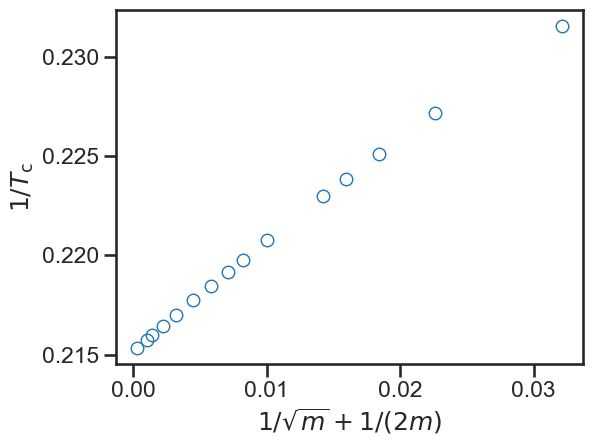

In [9]:
plt.plot(1/np.sqrt(df_crit["m"])+0.5/df_crit["m"],1/df_crit["Tc"],'o',mfc='None')
plt.ylabel(r'$1/T_{\rm c}$')
plt.xlabel(r'$1/\sqrt{m} + 1/(2m)$')
plt.tight_layout()
plt.savefig('Schultz_Flory_LJchains.pdf')

In [10]:
df_crit

,m,Tc,rho_s_c,rho_c
0,1000,4.318755,0.027262,2.726196e-05
1,2000,4.402053,0.017886,8.943018e-06
2,3000,4.442227,0.014176,4.725339e-06
3,4000,4.467170,0.012073,3.018127e-06
4,5000,4.484627,0.010679,2.135831e-06
5,10000,4.529509,0.007356,7.356184e-07
6,15000,4.550120,0.005940,3.960211e-07
7,20000,4.562625,0.005111,2.555741e-07
8,30000,4.577671,0.004142,1.380793e-07
9,50000,4.592996,0.003185,6.370313e-08


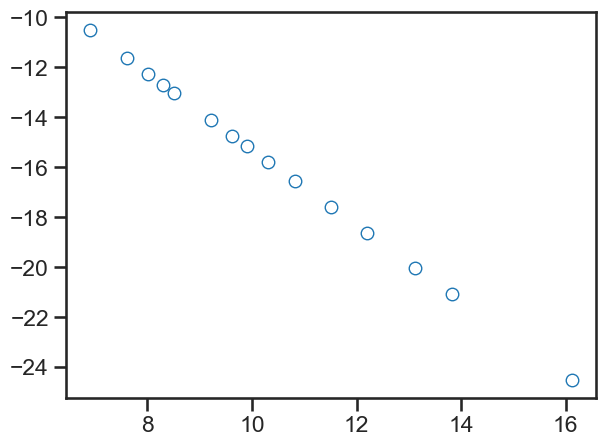

In [11]:
plt.plot(np.log(df_crit["m"]),np.log(df_crit["rho_c"]),'o',mfc='None')

# plt.plot(1/df_crit["m"]**1.2,df_crit["rho_c"],'o',mfc='None')
# plt.plot(1/df_crit["m"]**1.2,df_crit["rho_s_c"]/df_crit["m"],'x',mfc='None')
# plt.plot(1/df_crit["m"]**0.2,df_crit["rho_s_c"],'d',mfc='None')

# plt.plot(df_tc["m"]/df_tc["m"]**1.2,df_tc["m"]*df_tc["rho_c"],'o',mfc='None')
# plt.plot(1.0/df_tc["m"]**0.2,df_tc["rho_s_c"],'x',mfc='None')



# plt.plot(df_tc["m"],df_tc["rho_s_c"]/df_tc["rho_c"],'o',mfc='None')
# plt.ylabel(r'$\rho_{s,{\rm c}}$')
# plt.xlabel(r'$1/m^{1.2}$')
plt.tight_layout()
# plt.savefig('Schultz_Flory_LJchains.pdf')

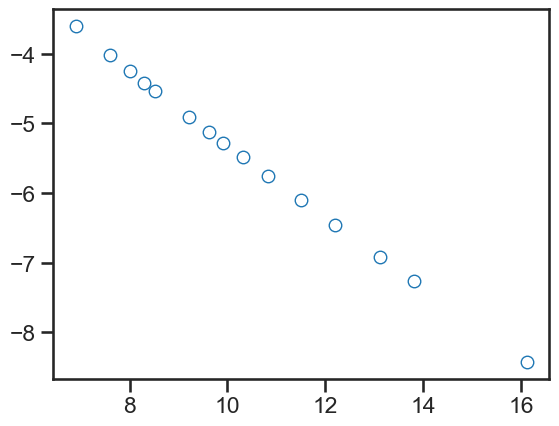

In [12]:
plt.plot(np.log(df_crit["m"]),np.log(df_crit["rho_s_c"]),'o',mfc='None')

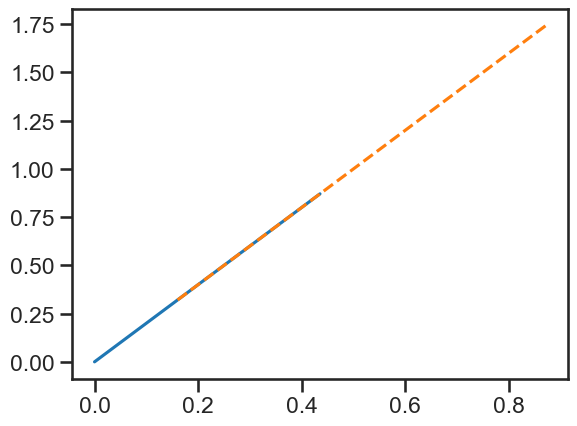

In [13]:
x = np.linspace(2,10000);
y1 = 2.0/x**1.2
y2 = x*y1

plt.plot(1.0/x**1.2,y1)
plt.plot(x/x**1.2,x*y1,'--')

# VLE diagrams

In [14]:
minimum_temperatue = 1 * epsilon_k * KELVIN

diagrams = {}

for mi in deiters_data.n.unique():
    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters,  max_eta=0.5, 
                                   perturbation=Perturbation.WeeksChandlerAndersenTPT,
                                   virial_order=VirialOrder.Second,
                                   # combination_rule=CombinationRule.OneFluidPsi
                                  )
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 15 * KELVIN) 
                                    # max_iter=100000, 
                                    # tol=1.e-1)

    
        
    if mi >= 8:
        minimum_temperatue = state_cp.temperature * 0.57
    else:
        minimum_temperatue = state_cp.temperature * 0.4
    
    dia = PhaseDiagram.pure(eos, minimum_temperatue, critical_temperature=epsilon_k * 15 * KELVIN, npoints=200)
    diagrams.update({mi: dia})

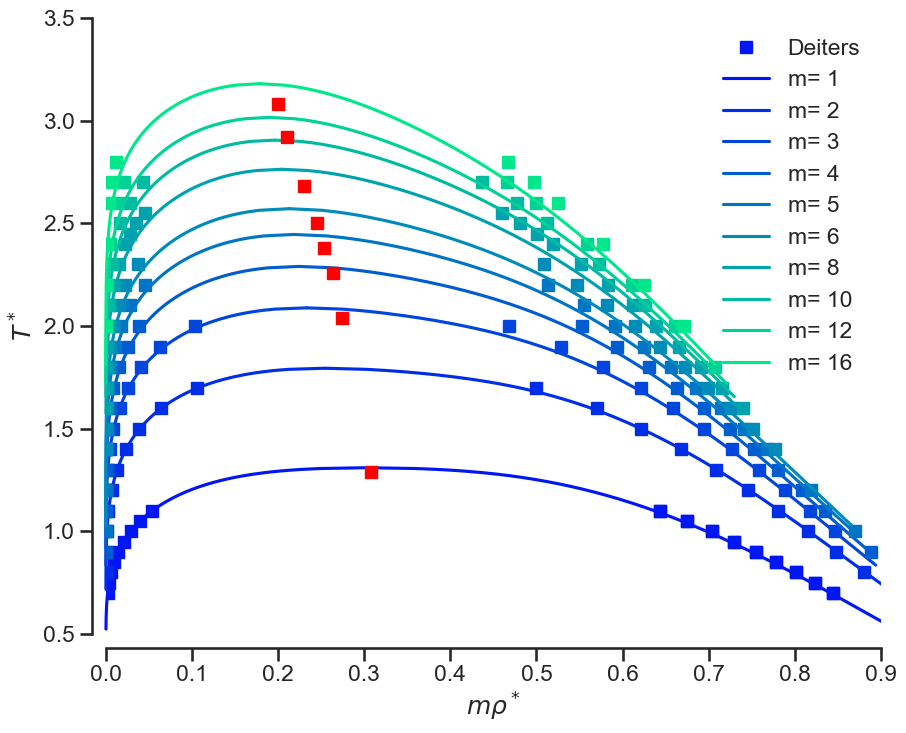

In [15]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.rhol, dd.t, "s", color=colors[i], label="Deiters")
    plt.plot(dd.rhol, dd.t, "s", color=colors[i])
    plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    
    plt.plot(dia.liquid.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.liquid.temperature / (epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    



plt.xlim(0.0, 0.9)
plt.ylim(0.5, 3.5)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.ylabel(r"$T^*$")
plt.xlabel(r"$m\rho^*$");

plt.plot(deiters_cp.rho_c, deiters_cp.Tc, 'rs')

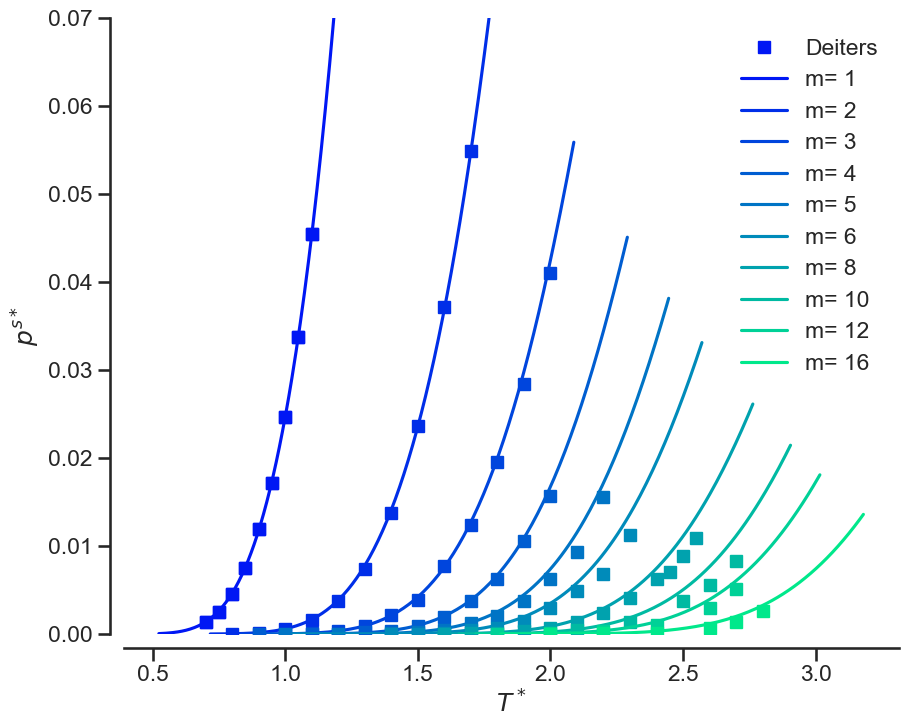

In [17]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.t, dd.pv, "s", color=colors[i], label="Deiters")
    plt.plot(dd.t, dd.pv, "s", color=colors[i])
    #plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    #print(dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN))
    plt.plot( dia.vapor.temperature / (epsilon_k * KELVIN), dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    #plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    


#plt.xlim(0.0, 0.9)
plt.ylim(0.0, 0.07)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.xlabel(r"$T^*$")
plt.ylabel(r"$p^{s*}$");
#plt.yscale('log')

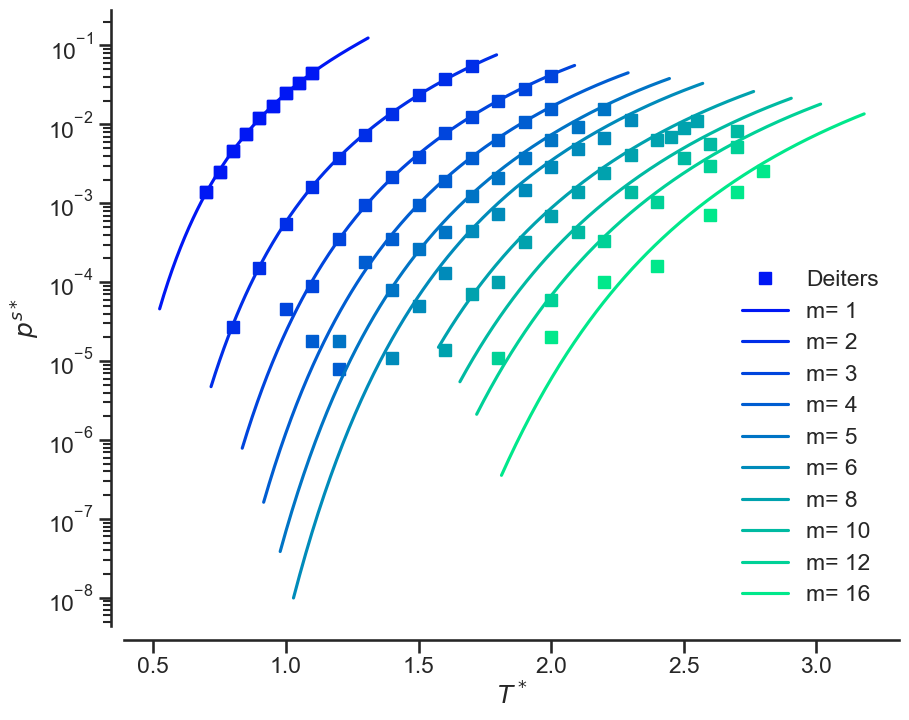

In [18]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.t, dd.pv, "s", color=colors[i], label="Deiters")
    plt.plot(dd.t, dd.pv, "s", color=colors[i])
    #plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    #print(dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN))
    plt.plot( (dia.vapor.temperature / (epsilon_k * KELVIN)), dia.vapor.pressure * (sigma * ANGSTROM)**3 / (KB * epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    #plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    


#plt.xlim(0.0, 0.9)
#plt.ylim(0.0, 0.07)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.xlabel(r"$T^*$")
plt.ylabel(r"$p^{s*}$");
plt.yscale('log')

In [8]:
minimum_temperatue = 1 * epsilon_k * KELVIN
#print(minimum_temperatue)

diagrams = {}
mvec = [1, 2,3, 8, 10, 16, 20, 30, 40, 50]
for mi in mvec:
    parameters = UVParameters.new_simple(mi, rep, att, sigma, epsilon_k)
    eos = EquationOfState.uvtheory(parameters, max_eta=0.5, perturbation=Perturbation.BarkerHenderson)
    state_cp = State.critical_point(eos, initial_temperature=epsilon_k * 15 * KELVIN)
    if mi >= 8:
        minimum_temperatue = state_cp.temperature * 0.57
    else:
        minimum_temperatue = state_cp.temperature * 0.4
    dia = PhaseDiagram.pure(eos, minimum_temperatue, critical_temperature=epsilon_k * 15 * KELVIN, npoints=200)
    diagrams.update({mi: dia})

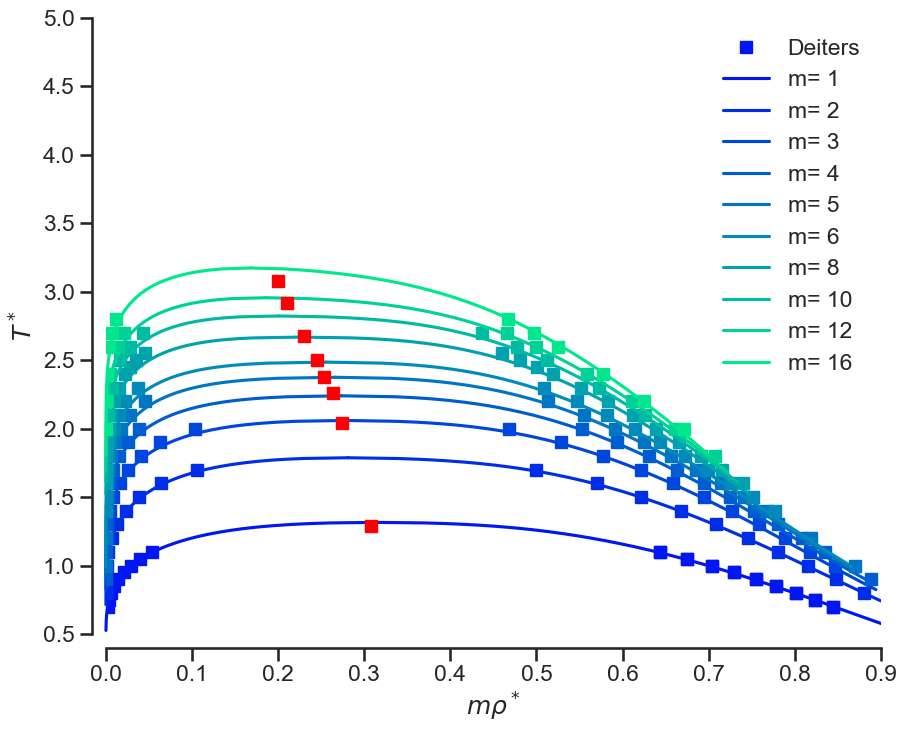

In [13]:
plt.figure(figsize=(10, 8))

for i, (mi, dia) in enumerate(diagrams.items()):
    dd = deiters_data[deiters_data.n == mi]
    if i == 0:
        plt.plot(dd.rhol, dd.t, "s", color=colors[i], label="Deiters")
    plt.plot(dd.rhol, dd.t, "s", color=colors[i])
    plt.plot(dd.rhov, dd.t, "s", color=colors[i])
    
    plt.plot(dia.liquid.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.liquid.temperature / (epsilon_k * KELVIN), color=colors[i], label=f"m= {mi}")
    plt.plot(dia.vapor.density * NAV * (sigma * ANGSTROM)**3 * mi, dia.vapor.temperature / (epsilon_k * KELVIN),color=colors[i], clip_on=False)
    



plt.xlim(0.0, 0.9)
plt.ylim(0.5,5)
sns.despine(offset=10)
plt.legend(frameon=False)
plt.ylabel(r"$T^*$")
plt.xlabel(r"$m\rho^*$");

plt.plot(deiters_cp.rho_c, deiters_cp.Tc, 'rs')